In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
import helper
from sklearn.metrics import silhouette_samples, silhouette_score

In [266]:
%matplotlib inline 

In [267]:
# Import the Movies dataset
movies = pd.read_csv('movies.csv') 
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [268]:
# Import the ratings dataset 
ratings = pd.read_csv('ratings.csv') 
ratings.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [269]:
# # helper裡面的東西
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from sklearn.cluster import KMeans
# from sklearn.metrics import mean_squared_error
# import itertools
# from sklearn.metrics import silhouette_samples, silhouette_score

# def draw_scatterplot(x_data, x_label, y_data, y_label):
#     fig = plt.figure(figsize=(8,8))
#     ax = fig.add_subplot(111)

#     plt.xlim(0, 5)
#     plt.ylim(0, 5)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.scatter(x_data, y_data, s=30)


# def draw_clusters(biased_dataset, predictions, cmap='viridis'):
#     fig = plt.figure(figsize=(8,8))
#     ax = fig.add_subplot(111)
#     plt.xlim(0, 5)
#     plt.ylim(0, 5)
#     ax.set_xlabel('Avg scifi rating')
#     ax.set_ylabel('Avg romance rating')
    

#     clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
#     plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

        
# def clustering_errors(k, data):
#     kmeans = KMeans(n_clusters=k).fit(data)
#     predictions = kmeans.predict(data)
#     #cluster_centers = kmeans.cluster_centers_
#     # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
#     # return sum(errors)
#     silhouette_avg = silhouette_score(data, predictions)
#     return silhouette_avg

# def sparse_clustering_errors(k, data):
#     kmeans = KMeans(n_clusters=k).fit(data)
#     predictions = kmeans.predict(data)
#     cluster_centers = kmeans.cluster_centers_
#     errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data, predictions)]
#     return sum(errors)


# def get_genre_ratings(ratings, movies, genres, column_names):
#     genre_ratings = pd.DataFrame()
#     for genre in genres:        
#         genre_movies = movies[movies['genres'].str.contains(genre) ]
#         avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
#         genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
#     print(genre_ratings)
#     genre_ratings.columns = column_names
#     return genre_ratings
    
# def get_dataset_3(movies, ratings, genre_ratings):    
#     # Extract action ratings from dataset
#     action_movies = movies[movies['genres'].str.contains('Action') ]
#     # Get average vote on action movies per user
#     avg_action_votes_per_user = ratings[ratings['movieId'].isin(action_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
#     # Add action ratings to romance and scifi in dataframe
#     genre_ratings_3 = pd.concat([genre_ratings, avg_action_votes_per_user], axis=1)
#     genre_ratings_3.columns = ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating']
    
#     # Let's bias the dataset a little so our clusters can separate scifi vs romance more easily
#     b1 = 3.2
#     b2 = 2.5
#     biased_dataset_3 = genre_ratings_3[((genre_ratings_3['avg_romance_rating'] < b1 - 0.2) & (genre_ratings_3['avg_scifi_rating'] > b2)) | ((genre_ratings_3['avg_scifi_rating'] < b1) & (genre_ratings_3['avg_romance_rating'] > b2))]
#     biased_dataset_3 = pd.concat([biased_dataset_3[:300], genre_ratings_3[:2]])
#     biased_dataset_3 = pd.DataFrame(biased_dataset_3.to_records())
    
#     return biased_dataset_3

# def draw_clusters_3d(biased_dataset_3, predictions):
#     fig = plt.figure(figsize=(8,8))
#     ax = fig.add_subplot(111)

#     plt.xlim(0, 5)
#     plt.ylim(0, 5)
#     ax.set_xlabel('Avg scifi rating')
#     ax.set_ylabel('Avg romance rating')

#     clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

#     colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

#     for g in clustered.group.unique():
#         color = next(colors)
#         for index, point in clustered[clustered.group == g].iterrows():
#             if point['avg_action_rating'].astype(float) > 3: 
#                 size = 50
#             else:
#                 size = 15
#             plt.scatter(point['avg_scifi_rating'], 
#                         point['avg_romance_rating'], 
#                         s=size, 
#                         color=color)
    
# def draw_movie_clusters(clustered, max_users, max_movies):
#     c=1
#     for cluster_id in clustered.group.unique():
#         # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
#         # You can change these values to see more users & movies per cluster
#         d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
#         n_users_in_cluster = d.shape[0]
        
#         d = sort_by_rating_density(d, max_movies, max_users)
        
#         d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
#         d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
#         d = d.iloc[:max_users, :max_movies]
#         n_users_in_plot = d.shape[0]
        
#         # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
#         if len(d) > 9:
#             print('cluster # {}'.format(cluster_id))
#             print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
#             fig = plt.figure(figsize=(15,4))
#             ax = plt.gca()

#             ax.invert_yaxis()
#             ax.xaxis.tick_top()
#             labels = d.columns.str[:40]

#             ax.set_yticks(np.arange(d.shape[0]) , minor=False)
#             ax.set_xticks(np.arange(d.shape[1]) , minor=False)

#             ax.set_xticklabels(labels, minor=False)
                        
#             ax.get_yaxis().set_visible(False)

#             # Heatmap
#             heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

#             ax.set_xlabel('movies')
#             ax.set_ylabel('User id')

#             divider = make_axes_locatable(ax)
#             cax = divider.append_axes("right", size="5%", pad=0.05)

#             # Color bar
#             cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
#             cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

#             plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
#             plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
#             #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

#             plt.show()


#             # Let's only show 5 clusters
#             # Remove the next three lines if you want to see all the clusters
#             # Contribution welcomed: Pythonic way of achieving this
#             # c = c+1
#             # if c > 6:
#             #    break
                
# def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
#     # 1- Count
#     user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
#     # 2- sort
#     user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
#     user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
#     # 3- slice
#     most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
#     return most_rated_movies

# def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
#     # Get most voting users
#     # 1- Count
#     most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
#     # 2- Sort
#     most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
#     # 3- Slice
#     most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
#     most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
#     return most_rated_movies_users_selection

# def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
#     most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
#     most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
#     return most_rated_movies
    
# def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
#     # Reverse to match the order of the printed dataframe
#     #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]
    
#     fig = plt.figure(figsize=(15,4))
#     ax = plt.gca()
    
#     # Draw heatmap
#     heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

#     if axis_labels:
#         ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
#         ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
#         ax.invert_yaxis()
#         ax.xaxis.tick_top()
#         labels = most_rated_movies_users_selection.columns.str[:40]
#         ax.set_xticklabels(labels, minor=False)
#         ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
#         plt.setp(ax.get_xticklabels(), rotation=90)
#     else:
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)
    
#     ax.grid(False)
#     ax.set_ylabel('User id')

#     # Separate heatmap from color bar
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)

#     # Color bar
#     cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
#     cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])



#     plt.show()
    
# def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
#     biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
#     biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
#     biased_dataset = pd.DataFrame(biased_dataset.to_records())
#     return biased_dataset

In [270]:
print('The dataset contains: ', len(ratings), ' ratings of ', len(movies), ' movies.')

The dataset contains:  100836  ratings of  9742  movies.


In [271]:
# Function to get the genre ratings 
def get_genre_ratings(ratings, movies, genres, column_names): 
    genre_ratings = pd.DataFrame()
    for genre in genres:
        genre_movies = movies[movies['genres'].str.contains(genre) ] 
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2) 
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
    genre_ratings.columns = column_names 
    return genre_ratings 
# Calculate the average rating of romance and scifi movies 
genre_ratings = get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating']) 
genre_ratings.head()



,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [272]:
# Function to get the biased dataset 
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset = genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))] 
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]]) 
    biased_dataset = pd.DataFrame(biased_dataset.to_records()) 
    return biased_dataset 
# Bias the dataset 
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

# Printing the resulting number of records & the head of the dataset 
print( "Number of records: ", len(biased_dataset)) 
biased_dataset.head()



Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


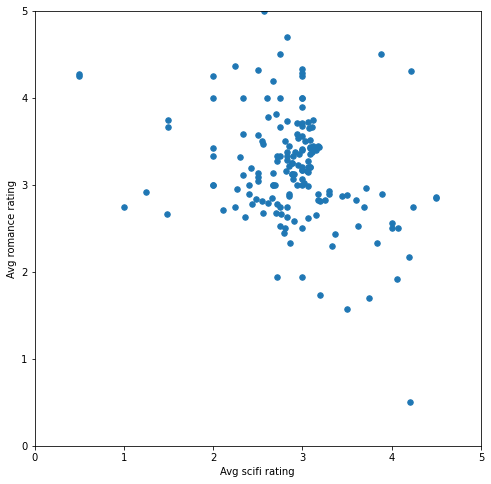

In [273]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8)) 
    ax = fig.add_subplot(111) 
    
    plt.xlim(0, 5) 
    plt.ylim(0, 5)
    ax.set_xlabel(x_label) 
    ax.set_ylabel(y_label) 
    ax.scatter(x_data, y_data, s=30) 
    
# Plot the scatterplot 
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')



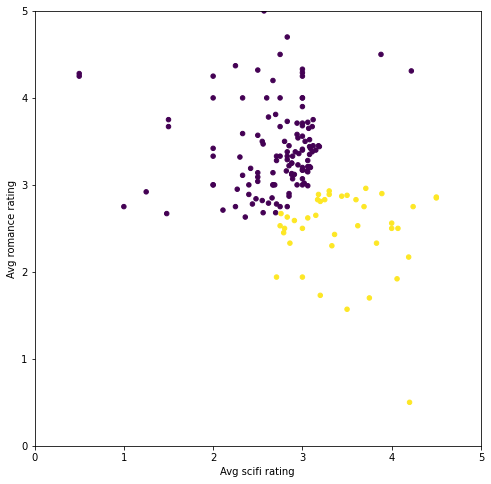

In [274]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values 
# Import KMeans 
from sklearn.cluster import KMeans 

# Create an instance of KMeans to find two clusters 
kmeans_1 = KMeans(n_clusters=2) 

# Use fit_predict to cluster the dataset 
predictions = kmeans_1.fit_predict(X)

# Defining the cluster plotting function 
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.xlim(0, 5) 
    plt.ylim(0, 5) 
    ax.set_xlabel('Avg scifi rating') 
    ax.set_ylabel('Avg romance rating')

    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)

# Plot 
draw_clusters(biased_dataset, predictions)

    


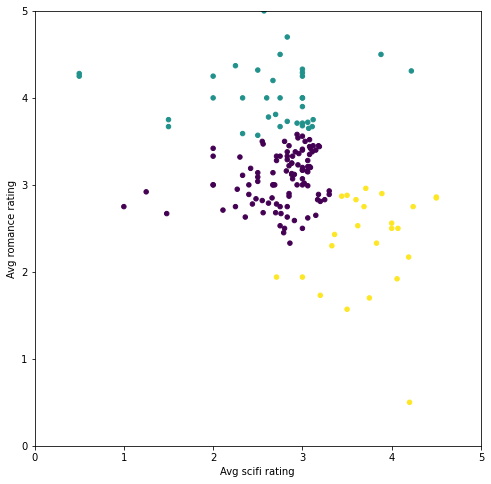

In [275]:
# Create an instance of KMeans to find three clusters 
kmeans_2 = KMeans(n_clusters=3) 

# Use fit_predict to cluster the dataset 
predictions_2 = kmeans_2.fit_predict(X) 
# Plot 
draw_clusters(biased_dataset, predictions_2)



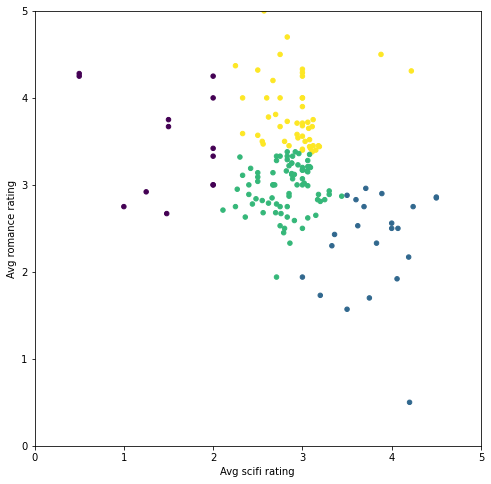

In [276]:
# Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)
# Use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)
# Plot 
draw_clusters(biased_dataset, predictions_3)



C:\Users\huang\Downloads\研究所的東西\資訊科學\1215\ntunhs_2021-main\20211206_day_master\helper.py:35: ConvergenceWarning: Number of distinct clusters (157) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k).fit(data)


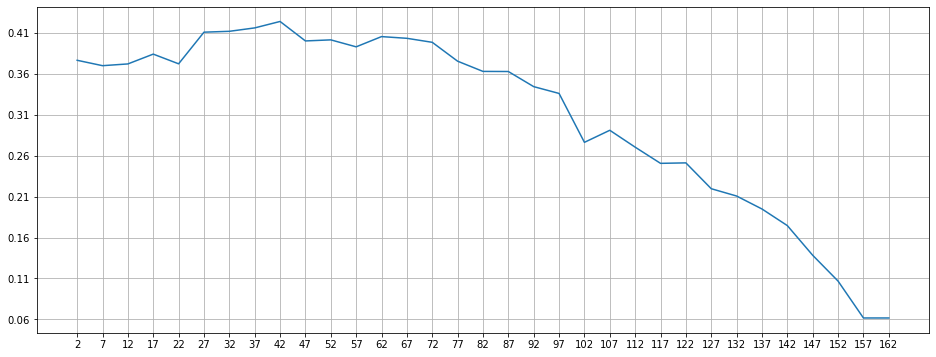

In [277]:
# Selecting our dataset to study 
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value 

possible_k_values = range(2, len(X)+1, 5) 

# Define function to calculate the clustering errors
def clustering_errors(k, data): 
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    
    #cluster_centers = kmeans.cluster_centers_ 
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors) 
    silhouette_avg = silhouette_score(data, predictions) 
    return silhouette_avg

# Calculate error values for all k values we're interested in
errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values] 

# Plot the each value of K vs. the silhouette score at that value 
fig, ax = plt.subplots(figsize=(16, 6)) 
plt.plot(possible_k_values, errors_per_k) 

# Ticks and grid 
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0) 
ax.set_xticks(xticks, minor=False) 
ax.set_xticks(xticks, minor=True) 
ax.xaxis.grid(True, which='both') 
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05) 
ax.set_yticks(yticks, minor=False) 
ax.set_yticks(yticks, minor=True) 
ax.yaxis.grid(True, which='both')

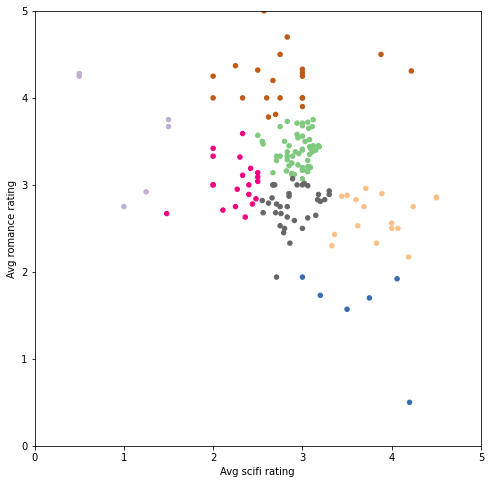

In [278]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7) 

# Use fit_predict to cluster the dataset 
predictions_4 = kmeans_4.fit_predict(X)

# Plot 
draw_clusters(biased_dataset, predictions_4, cmap='Accent')



In [279]:
# Select our biased dataset and add action genre
biased_dataset_3_genres = get_genre_ratings(ratings, movies, ['Romance','Sci-Fi', 'Action'],['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])

# Drop null values
biased_dataset_3_genres = bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna() 

# Print the number of records and the head of our dataset 
print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()



Number of records:  161


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


In [280]:
def biased_dataset_3(movies, ratings, genre_ratings):    
    # Extract action ratings from dataset
    action_movies = movies[movies['genres'].str.contains('Action') ]
    # Get average vote on action movies per user
    avg_action_votes_per_user = ratings[ratings['movieId'].isin(action_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
    # Add action ratings to romance and scifi in dataframe
    genre_ratings_3 = pd.concat([genre_ratings, avg_action_votes_per_user], axis=1)
    genre_ratings_3.columns = ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating']
    
    # Let's bias the dataset a little so our clusters can separate scifi vs romance more easily
    b1 = 3.2
    b2 = 2.5
    biased_dataset_3 = genre_ratings_3[((genre_ratings_3['avg_romance_rating'] < b1 - 0.2) & (genre_ratings_3['avg_scifi_rating'] > b2)) | ((genre_ratings_3['avg_scifi_rating'] < b1) & (genre_ratings_3['avg_romance_rating'] > b2))]
    biased_dataset_3 = pd.concat([biased_dataset_3[:300], genre_ratings_3[:2]])
    biased_dataset_3 = pd.DataFrame(biased_dataset_3.to_records())
    
    return biased_dataset_3

In [281]:
# Turn dataset into a list 
X_with_action = biased_dataset_3_genres[['avg_scifi_rating','avg_romance_rating','avg_action_rating']].values

# Create an instance of KMeans to find seven clusters 
kmeans_5 = KMeans(n_clusters=7) 

# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action) 

# Define 3d plotting function 

def draw_clusters_3d(biased_dataset_3, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')

    clustered = pd.concat([biased_dataset_3.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_action_rating'].astype(float) > 3: 
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_scifi_rating'], 
                        point['avg_romance_rating'], 
                        s=size, 
                        color=color)



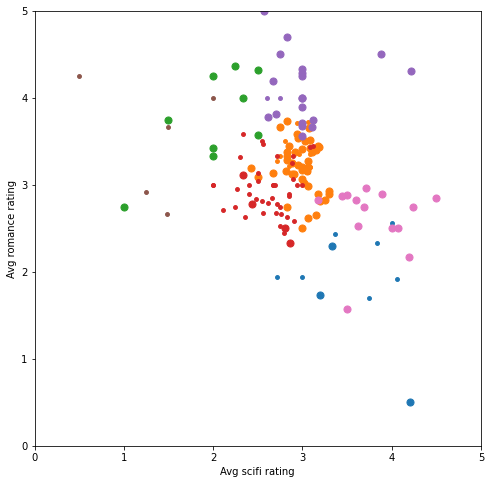

In [282]:
# Plot
draw_clusters_3d(biased_dataset_3_genres, predictions_5)


In [283]:
# Merge the two tables then pivot so we have Users X Movies dataframe 
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' ) 
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating') 
# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]



dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
# 定義函式取得評分最高的那些電影群的用戶
# 為了大部分用戶沒有做電影評分的問題，按評分高到低的電影的用戶對數據集進行排序。
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [285]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

In [286]:
# Define the sorting by rating function
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies 
# choose the number of movies and users and sort 
n_movies = 30
n_users = 18
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

# Print the result
print('dataset dimensions: ', most_rated_movies_users_selection.shape)
most_rated_movies_users_selection.head()



dataset dimensions:  (18, 30)


title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


In [287]:
# # Define the plotting heatmap function 
# def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
#     fig = plt.figure(figsize=(15,4))
#     ax = plt.gca() 
#     # Draw heatmap 
#     heatmap = ax.imshow(most_rated_movies_users_selection, interpolation='nearest', vmin=0, vmax=5, aspect='auto')

# if axis_labels:
#     ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False) 
#     ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False) 
#     ax.invert_yaxis() 
#     ax.xaxis.tick_top() 
#     labels = most_rated_movies_users_selection.columns.str[:40]
#     ax.set_xticklabels(labels, minor=False) 
#     ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
#     plt.setp(ax.get_xticklabels(), rotation=90)
# else: 
#     ax.get_xaxis().set_visible(False) 
#     ax.get_yaxis().set_visible(False)
    
#     ax.grid(False) 
#     ax.set_ylabel('User id')
# # Separate heatmap from color bar 
# divider = make_axes_locatable(ax) 
# cax = divider.append_axes("right", size="5%", pad=0.05)
# # Color bar 
# cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax) 
# cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars']) 
# plt.show() 





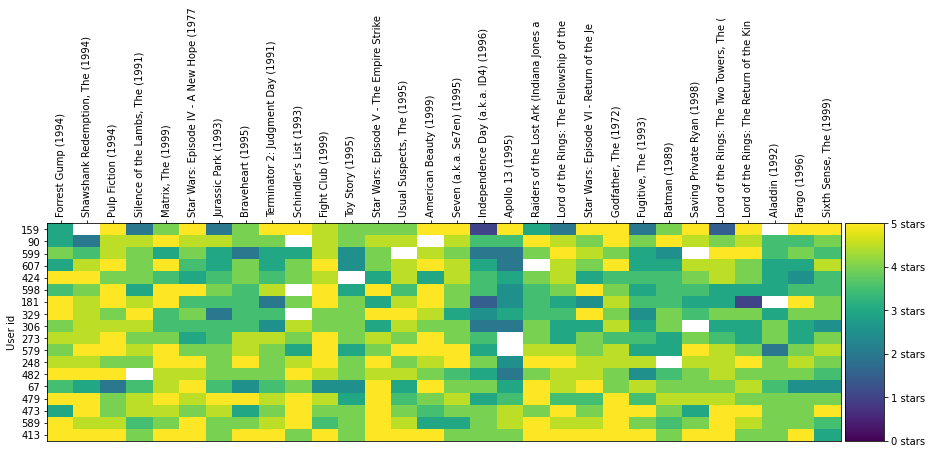

In [288]:
# Print the heatmap 
draw_movies_heatmap(most_rated_movies_users_selection)


In [289]:
# Pivot the dataset and choose the first 1000 movies
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)



In [290]:
# sparse_ratings = csr_matrix(pd.DataFrame.sparse.from_spmatrix(most_rated_movies_1k).to_coo())

# sparse_ratings = csr_matrix(pd.sparse.from_spmatrix(most_rated_movies_1k).to_coo())


# sparse_ratings = csr_matrix(pd.DataFrame.sparse(most_rated_movies_1k).to_coo())
from scipy import sparse
a=np.arange(100000).reshape(1000,100)
a[10:300]=0
sparse_ratings=sparse.csr_matrix(a)

In [291]:
def draw_movie_clusters(clustered, max_users, max_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]
        
        d = sort_by_rating_density(d, max_movies, max_users)
        
        d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]
        
        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()


            # Let's only show 5 clusters
            # Remove the next three lines if you want to see all the clusters
            # Contribution welcomed: Pythonic way of achieving this
            # c = c+1
            # if c > 6:
            #    break

In [292]:
# 20 clusters 
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
# Select the mas number of users and movies heatmap cluster 
max_users = 70 
max_movies = 50

# Cluster and print some of them 
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1) 




In [293]:
draw_movie_clusters(clustered, max_users, max_movies)


AttributeError: 'DataFrame' object has no attribute 'reindex_axis'

In [294]:
# Pick a cluster ID from the clusters above 
cluster_number = 11 
# Let's filter to only see the region of the dataset with the most number of values
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1) 
# Sort and print the cluster
cluster = sort_by_rating_density(cluster, n_movies, n_users)





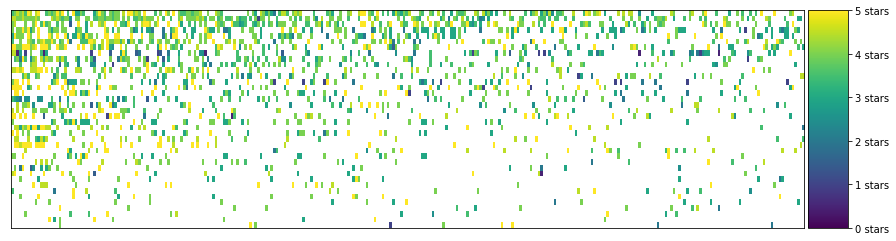

In [295]:
draw_movies_heatmap(cluster, axis_labels=False)

In [296]:
# Print the ratings
cluster.fillna('').head()



,Forrest Gump (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Pulp Fiction (1994),American Beauty (1999),Schindler's List (1993),Star Wars: Episode V - The Empire Strikes Back (1980),"Matrix, The (1999)",Fight Club (1999),...,"River Wild, The (1994)",Escape from L.A. (1996),Basic Instinct (1992),Get Shorty (1995),Cast Away (2000),Better Off Dead... (1985),"Great Escape, The (1963)",Entrapment (1999),Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),"Pan's Labyrinth (Laberinto del fauno, El) (2006)"
16,3.5,4.0,4.5,4.0,4.5,3.5,5.0,4.5,,4.5,...,,,,,4.0,4.5,,,,
13,4.5,4.5,4.0,4.0,4.5,4.0,4.0,4.0,4.0,4.5,...,,,3.5,,,,,3.0,3.0,
15,4.0,4.5,,,,4.0,,,4.0,5.0,...,,,,3.5,,5.0,,,,
27,4.0,,4.0,4.0,5.0,4.0,5.0,3.0,4.0,,...,3.0,2.0,3.0,3.0,,,4.0,3.0,,
31,3.0,5.0,4.0,4.0,4.0,,5.0,4.0,,,...,,,3.0,3.0,,3.0,,,,


In [297]:
# Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)' 
movie_name = "Matrix, The (1999)" 
cluster[movie_name].mean()



4.071428571428571

In [250]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)



Forrest Gump (1994)                                      4.275862
Matrix, The (1999)                                       4.520833
Shawshank Redemption, The (1994)                         4.522727
Pulp Fiction (1994)                                      4.227273
Silence of the Lambs, The (1991)                         4.277778
Star Wars: Episode V - The Empire Strikes Back (1980)    3.916667
Braveheart (1995)                                        4.441176
Schindler's List (1993)                                  4.088235
Fight Club (1999)                                        4.588235
Saving Private Ryan (1998)                               4.375000
Star Wars: Episode IV - A New Hope (1977)                4.000000
Jurassic Park (1993)                                     4.156250
Aladdin (1992)                                           4.000000
Lion King, The (1994)                                    4.000000
Star Wars: Episode VI - Return of the Jedi (1983)        3.966667
Terminator

In [251]:
# Pick a user ID from the dataset
user_id = 19

# Get all this user's ratings 
user_2_ratings = cluster.loc[user_id, :] 

# Which movies did they not rate? 
user_2_unrated_movies = user_2_ratings[user_2_ratings.isnull()] 

# What are the ratings of these movies the user did not rate? 
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0] 

# Let's sort by rating so the highest rated movies are presented first 
avg_ratings.sort_values(ascending=False)[:20]



Trainspotting (1996)                      4.700000
When Harry Met Sally... (1989)            4.700000
King's Speech, The (2010)                 4.625000
Fight Club (1999)                         4.588235
Shawshank Redemption, The (1994)          4.522727
Snatch (2000)                             4.500000
Monty Python and the Holy Grail (1975)    4.500000
Jaws (1975)                               4.444444
Braveheart (1995)                         4.441176
Reservoir Dogs (1992)                     4.428571
Departed, The (2006)                      4.416667
Heat (1995)                               4.416667
Femme Nikita, La (Nikita) (1990)          4.400000
Breakfast Club, The (1985)                4.375000
Ocean's Eleven (2001)                     4.357143
Sin City (2005)                           4.357143
American History X (1998)                 4.350000
Requiem for a Dream (2000)                4.333333
Dark Knight, The (2008)                   4.333333
Intouchables (2011)            